In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import matrix
from numpy import matrix
from matplotlib import cm
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sympy import *
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math

Punto 1

In [2]:
# Creación dataframe
df = pd.DataFrame({'Y': np.arange(6), 'X_1': np.arange(6)})

Punto 2

In [3]:
#Funciones modelo y de costo
def funcion(theta_0, theta1):
  return theta_0+theta1*df['X_1']
def funcion_costo(theta_0, theta1):
  return (np.sum(funcion(theta_0, theta1)-df['Y'])**2)/2*len(df)

Punto 3

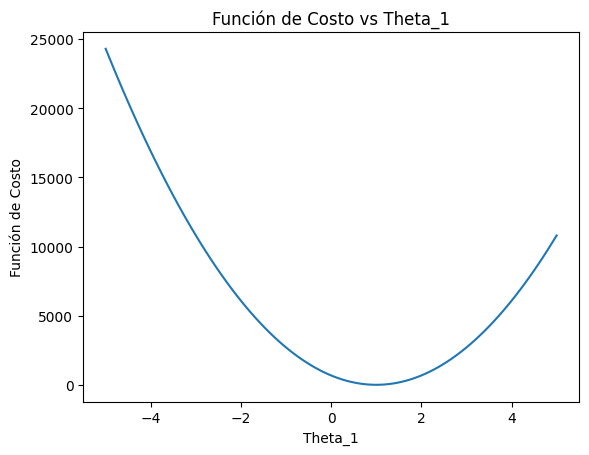

In [4]:
# Grafica de funcion de costo en array de theta1 y theta_0=0
theta_0=0
theta_1_values = np.linspace(-5, 5, 100)
cost = [funcion_costo(theta_0, theta_1) for theta_1 in theta_1_values]

plt.plot(theta_1_values, cost)
plt.xlabel('Theta_1')
plt.ylabel('Función de Costo')
plt.title('Función de Costo vs Theta_1')
plt.show()


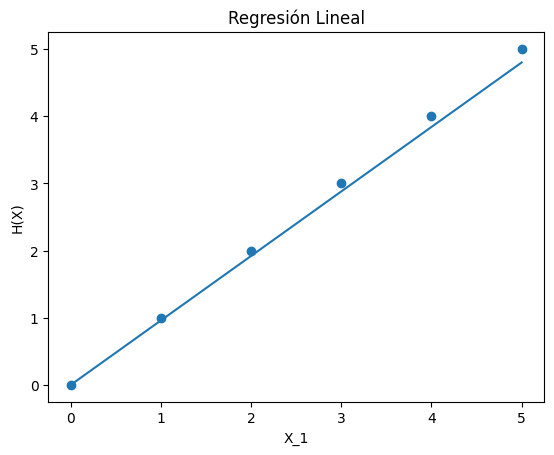

In [5]:
# Grafica de función modelo y valores de caracteristica X
# Se toma el minimo de la función de costo
min_cost = min(cost)
theta_1_min_cost = theta_1_values[cost.index(min_cost)]

plt.plot(df['X_1'],funcion(theta_0, theta_1_min_cost))
plt.scatter(df['X_1'],df['Y'])
plt.xlabel('X_1')
plt.ylabel('H(X)')
plt.title('Regresión Lineal')
plt.show()


Punto 4

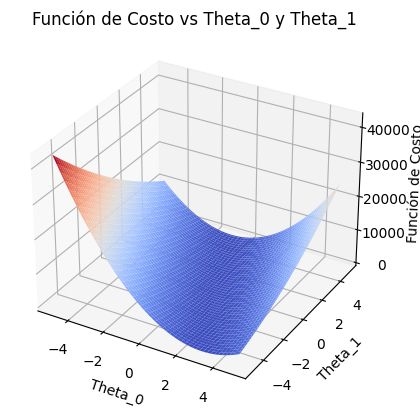

In [6]:
#Construcción de valores theta1 y theta_0
theta_0_values = np.linspace(-5, 5, 100)
theta1_values = np.linspace(-5, 5, 100)
# Definición de meshgrid para theta1 y theta_0
theta_0_grid, theta1_grid = np.meshgrid(theta_0_values, theta1_values)
#Evaluación en la función de coste
cost_grid = np.array([[funcion_costo(theta_0, theta1) for theta1 in theta1_values] for theta_0 in theta_0_values])


# Grafico 3D

#  figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica de la superficie
ax.plot_surface(theta_0_grid, theta1_grid, cost_grid, cmap=cm.coolwarm)

# Etiquetas de los ejes
ax.set_xlabel('Theta_0')
ax.set_ylabel('Theta_1')
ax.set_zlabel('Función de Costo')

# Título del gráfico
ax.set_title('Función de Costo vs Theta_0 y Theta_1')

# Mostrar el gráfico
plt.show()


Punto 5

In [8]:
# Expresiones teoricas para la función de coste
display(Math(r'Para \ el \ caso \ 1D  \ con \ caracteristicas \ X_1: \\ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=0}^m ((\theta_0+\theta_1X_1^i) - y^i)^2 \\ Para \ \theta_0=0, \\ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=0}^m ((\theta_1X_1^i) - y^i)^2'))

display(Math(r'Para \ el \ caso \ 2D \ con \  un \ \theta_0, \theta_1, \theta_2 \ y  \ caracterisiticas \ X_1 \ y \ X_2 \\'))

display(Math(r'Con  \  la \ funcion \ H \ definidad: '))

display(Math(r'H(\theta_0, \theta_1, \theta2)= \theta_0 + \theta_1X_1^m + \theta_2X_2^{m}, \ para \ un  \ \theta_0=0 , \\ Entonces:'))

display(Math(r'J(\theta_0, \theta_1, \theta2) = \frac{1}{2m} \sum_{i=0}^m ((X_1^{i}\theta_1+X_2^{i}\theta_2) - y^{(i)})^2=\frac{1}{2m} \sum_{i=0}^m (H(\theta_0, \theta_1, \theta2) - y^{(i)})^2'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Punto 6


In [12]:
#Construcion del gradiente descente
x = symbols('x')

#Función de coste
def func(x):
  return (x-4)**2

# Datos
a=[0.001,0.025,0.45]
x_r=np.random.rand()
theta_1=[]
iteraciones=100000  # Aumentar el número de iteraciones para mayor precisión
tolerancia = 1e-4 # Precisión
derivada=lambdify(x,func(x).diff(x)) # Devivada analitica
numeric_func = lambdify(x, func(x), 'numpy')
x_prev = 0

#Gradiente descendente
# Valores de theta hasta el minimo de la función
for j in a:
  for i in range(iteraciones):
    x_next=x_r-j*derivada(x_r)
    theta_1.append(x_next)

    # Verificar la tolerancia
    if abs(x_next - x_prev) < tolerancia:
      print(f"Valor aproximado del mínimo de a= {j}: {x_next}")
      print(f"Valor de la función en el mínimo a= {j}: {numeric_func(x_next)}")
      break

    x_prev = x_r
    x_r = x_next

Valor aproximado del mínimo de a= 0.001: 3.97511763131902
Valor de la función en el mínimo a= 0.001: 0.0006191322711762052
Valor aproximado del mínimo de a= 0.025: 3.999111217441911
Valor de la función en el mínimo a= 0.025: 7.899344355636148e-07
Valor aproximado del mínimo de a= 0.45: 3.9999990644394128
Valor de la función en el mínimo a= 0.45: 8.752736123650341e-13


Punto 7

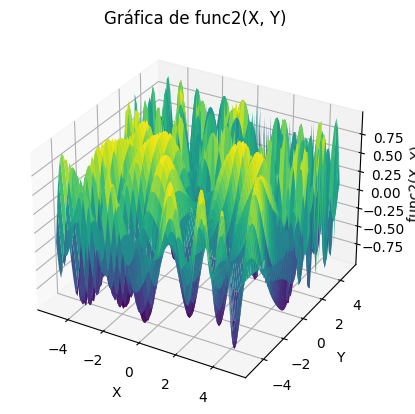

In [10]:
# Grafica de la función en 3D
# Definición del rango de valores para x e y
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)

# Creación de malla de valores x e y
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluación de la función func2 en la malla de valores
Z = np.sin(((X**2)/2) - ((Y**2)/4) + 3) * np.cos(2*X + 1 - np.exp(Y))


# Creación la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficación de la superficie
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis)

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('func2(X, Y)')
ax.set_title('Gráfica de func2(X, Y)')
plt.show()


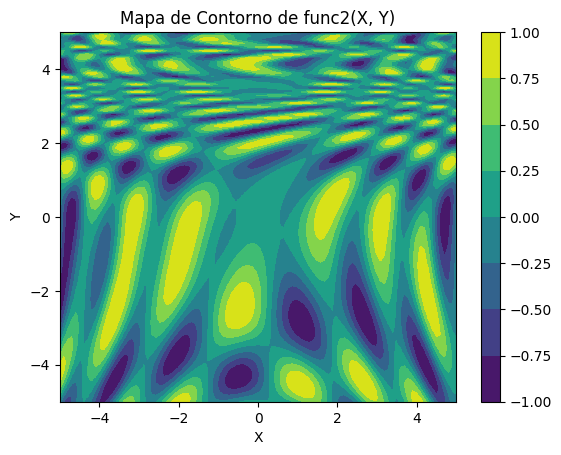

In [11]:
#Creación de mapa de contorno
# Definición  del rango de valores para x e y
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)

# Creación una malla de valores x e y
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluación de la función func2 en la malla de valores
Z = np.sin(((X**2)/2) - ((Y**2)/4) + 3) * np.cos(2*X + 1 - np.exp(Y))

# Creación el mapa de contorno
plt.contourf(X, Y, Z, cmap='viridis')

# Barra de color
plt.colorbar()

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mapa de Contorno de func2(X, Y)')
plt.show()


Mínimo aproximado en x: 0.0
Mínimo aproximado en y: 0.0
Valor de la función en el mínimo: 0.1411200080598672


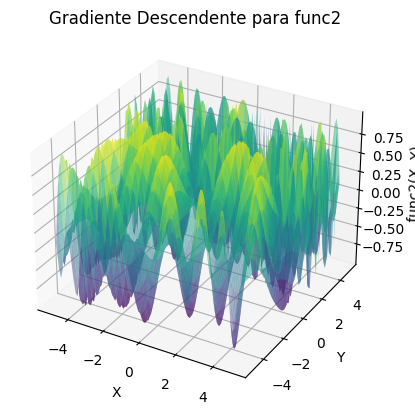

In [13]:
# Determinación del minimo

# Función
x, y = symbols('x y')
def func2(x, y):
  return sin(((x**2)/2) - ((y**2)/4) + 3) * cos(2*x + 1 - exp(y))

# Calculo de las derivadas parciales
derivada_x = diff(func2(x, y), x)
derivada_y = diff(func2(x, y), y)

# Converción de las derivadas a funciones numéricas con lambdify
derivada_x_func = lambdify((x, y), derivada_x, 'numpy')
derivada_y_func = lambdify((x, y), derivada_y, 'numpy')
numeric_func = lambdify((x, y), func2(x, y), 'numpy')


# Definición del Gradiente descendente para función con dos variables
#Con variables: Función, derivada parciales, reinicio de cada iteración

def gradiente_descente(func, derivada_x_func, derivada_y_func, inicial_x, inicial_y, learning_rate, iteraciones):
  x = inicial_x # Valores iniciales
  y = inicial_y
  x_hist = [x] # lista para almacenar valores
  y_hist = [y]
  for i in range(iteraciones):
    gradiente_x = derivada_x_func(x, y) # Derivadas
    gradiente_y = derivada_y_func(x, y)
    x = x - learning_rate * gradiente_x # Calculo de los valores donde la función desciende
    y = y - learning_rate * gradiente_y
    x_hist.append(x)
    y_hist.append(y)
  return x, y, x_hist, y_hist


# Parámetros del gradiente descendente
inicial_x = 0
inicial_y = 0
learning_rate = 0.01
iteraciones = 1000

# Ejecución del gradiente descendente
x_min, y_min, x_hist, y_hist = gradiente_descente(func2, derivada_x_func, derivada_y_func, inicial_x, inicial_y, learning_rate, iteraciones)

print(f"Mínimo aproximado en x: {x_min}")
print(f"Mínimo aproximado en y: {y_min}")
print(f"Valor de la función en el mínimo: {numeric_func(x_min, y_min)}")


# Graficación el recorrido del gradiente descendente punto a punto hasta el minimo
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = numeric_func(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)
ax.plot([x for x in x_hist], [y for y in y_hist], [numeric_func(x, y) for x, y in zip(x_hist, y_hist)], marker='o', linestyle='-', color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('func2(X, Y)')
ax.set_title('Gradiente Descendente para func2')
plt.show()


Punto 8

In [15]:
# Regresión lineal con gradiente descendente

# Definición de valores de entrenamiento y caracteristica X
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)

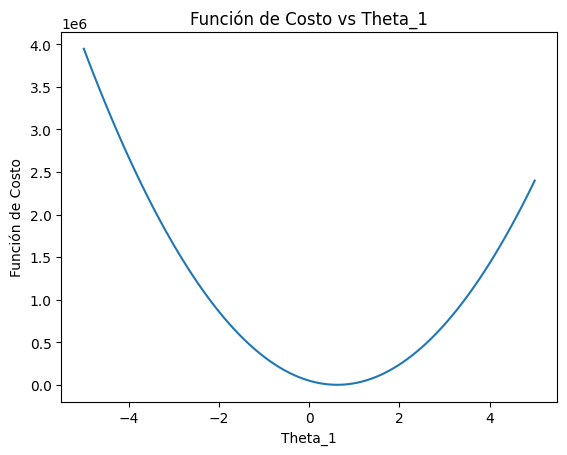

In [16]:
# Dataframe
df=pd.DataFrame({'X_1':X,'Y':y})
# Modelo lineal
def funcion(theta_0, theta1):
  return theta_0+theta1*df['X_1']
# Función de costo
def funcion_costo(theta_0, theta1):
  return (np.sum(funcion(theta_0, theta1)-df['Y'])**2)/2*len(df)
theta_0=0
theta_1_values = np.linspace(-5, 5, 100)
cost = [funcion_costo(theta_0, theta_1) for theta_1 in theta_1_values]

# Grafica función de costo
plt.plot(theta_1_values, cost)
plt.xlabel('Theta_1')
plt.ylabel('Función de Costo')
plt.title('Función de Costo vs Theta_1')
plt.show()

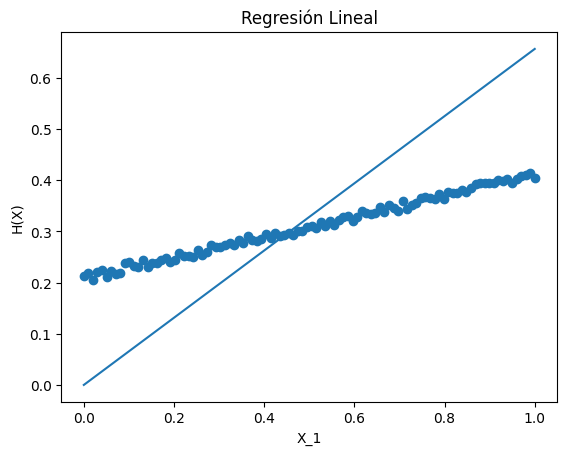

In [17]:
# Grafica de función modelo y valores de la caracteristica X
min_cost = min(cost)
theta_1_min_cost = theta_1_values[cost.index(min_cost)]

plt.plot(df['X_1'],funcion(theta_0, theta_1_min_cost))
plt.scatter(df['X_1'],df['Y'])
plt.xlabel('X_1')
plt.ylabel('H(X)')
plt.title('Regresión Lineal')
plt.show()


Punto 9

Theta_0: 0.20769373738167202
Theta_1: 0.20395743725276616


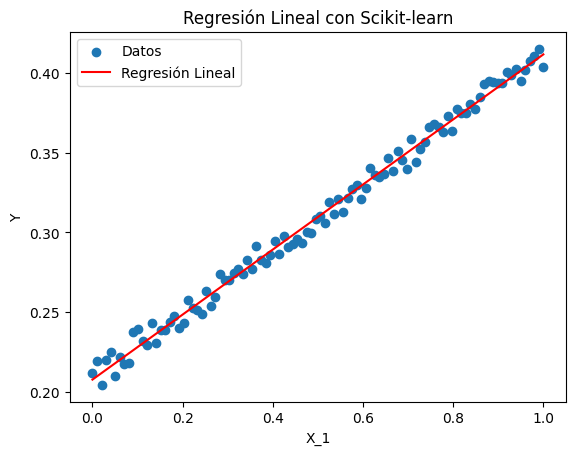

In [18]:
# Regresión lineal con linearRegresion

# Creación de  modelo de regresión lineal
model = LinearRegression()

# Creación de dataframe con caracteristica y datos de entrenamiento
X = df[['X_1']]
y = df['Y']
model.fit(X, y)

# Coeficientes de la regresión
theta_0 = model.intercept_
theta_1 = model.coef_[0]

print(f"Theta_0: {theta_0}")
print(f"Theta_1: {theta_1}")

# Realización de predicciones
y_pred = model.predict(X)

# Graficación de  los resultados
plt.scatter(df['X_1'], df['Y'], label='Datos')
plt.plot(df['X_1'], y_pred, color='red', label='Regresión Lineal')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.title('Regresión Lineal con Scikit-learn')
plt.legend()
plt.show()

In [32]:
# Comprobación de la solución
N = 100
x = np.linspace(0, 1, 100)
y = 0.2 + 0.2*x + 0.02*np.random.random(100)

# Dataframe

df = pd.DataFrame({"x_1":x, 'y':y})
df["ones"]=1

# Creación de las matrices
X = df[["ones", "x_1"]].values.T
Y = df.y.values.reshape(1, N)

In [33]:
# Funciones de costo y modelo
def model(theta, X):
  return theta.T@X

def costo(h, Y):
  J= (h-Y)**2
  return J.mean()

# Gradiente descendente
def update_params(theta, h, Y, learning_rate):
  """
  Gradiente descendente
  """
  grad = np.dot((h-Y), X.T).T
  theta = theta - learning_rate*grad
  return theta

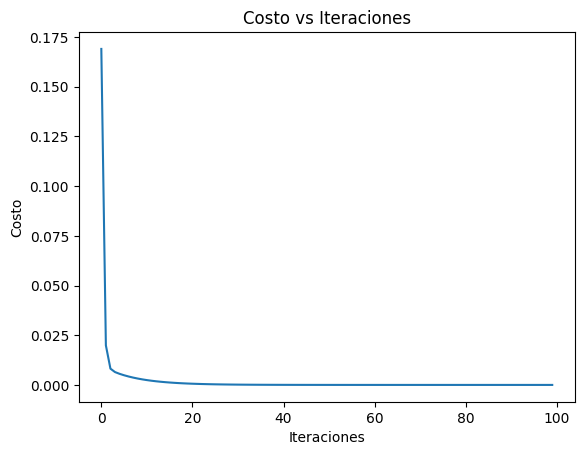

In [34]:
# Calculo de función de coste
theta=np.random.random(2).reshape(2, 1)
learning_rate=0.01
Niter=100
J = np.zeros(Niter)

for i in range(0, Niter):
  h = model(theta, X)
  J[i] = costo(h, Y)
  theta = update_params(theta, h, Y, learning_rate)

# Graficación de la minimización de la curva descendente de los valores de theta con cada iteración
plt.plot(J)
plt.xlabel("Valores de theta")
plt.ylabel("Costo")
plt.title("Costo vs Valores de theta")
plt.show()